The beta distribution is the conjugate prior to the binomial distribution.
P(lambda)=Beta(lambda,alpha=2,beta=5)
P(lambda/y)=L(y/lambda). Beta(lambda,alpha,beta)

Posterior Beta-bin= Beta(α=ny¯+2,β=nN-ny¯+5)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

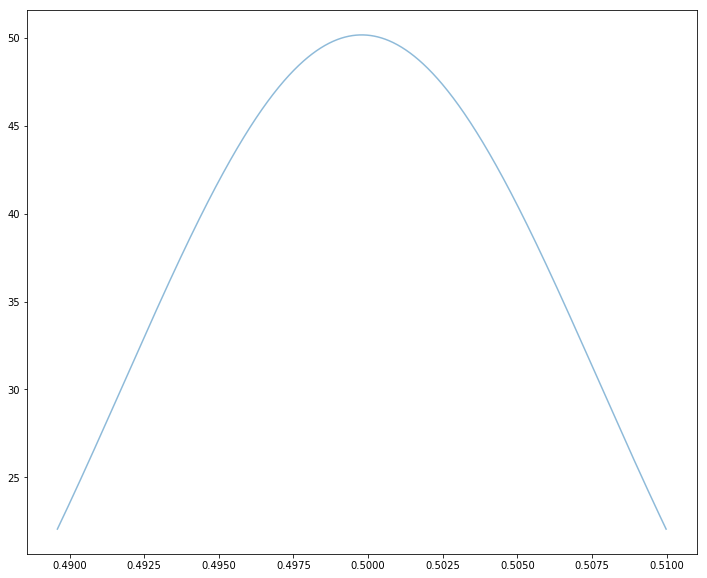

In [11]:
n, p = 5, 0.4
y= stats.binom.rvs(n, p, size=1000)

prior_p= 2.31
prior_n= 0.627
post_n= 1000* y.mean() + prior_n
post_p= 1000* y.mean() + prior_p

post = stats.beta(post_n, post_p)

plt.figure(1, figsize=(12, 10))
x = np.linspace(post.ppf(0.10), post.ppf(0.90), 1000)
pd.Series(post.pdf(x), index=x).plot(alpha=0.5, label='posterior')

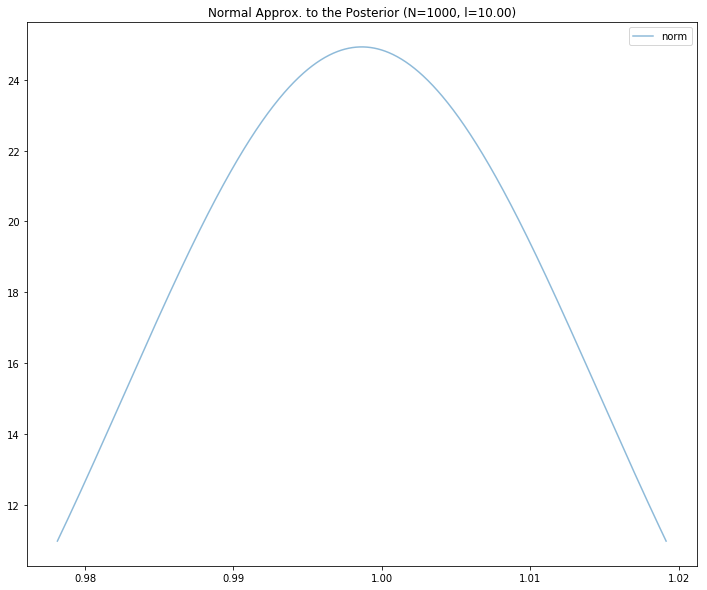

In [12]:
# Generate our normal approximation
n=1000
mu = (post_n - 1.) / post_p
sigma2 = n / post_p ** 2
norm = stats.norm(loc=mu, scale=np.sqrt(sigma2))

# Plot normal approximation
plt.figure(1, figsize=(12, 10))
x = np.linspace(norm.ppf(0.1), norm.ppf(0.90), 1000)
pd.Series(norm.pdf(x), index=x).plot(alpha=0.5, label='norm')
plt.title('Normal Approx. to the Posterior (N=%d, l=%.2f)' % (n,10))
plt.legend(loc='best')

In [20]:
import math
n=1000
p=0.1

def intervals(n, p):
    mean = n*p
    std = math.sqrt((n*p*(1-p)))
    error = round(std*2/n*100)
    return error


for percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    row = []
    for sample_size in [1000, 750, 500, 250, 100]:
        row.append(intervals(sample_size, percentage))
    print('Percentage ', percentage, ': ', row)

Percentage  0.1 :  [2, 2, 3, 4, 6]
Percentage  0.2 :  [3, 3, 4, 5, 8]
Percentage  0.3 :  [3, 3, 4, 6, 9]
Percentage  0.4 :  [3, 4, 4, 6, 10]
Percentage  0.5 :  [3, 4, 4, 6, 10]
Percentage  0.6 :  [3, 4, 4, 6, 10]
Percentage  0.7 :  [3, 3, 4, 6, 9]
Percentage  0.8 :  [3, 3, 4, 5, 8]
Percentage  0.9 :  [2, 2, 3, 4, 6]
